In [9]:
# Importing librarys
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Load the breast cancer dataset
data = pd.read_csv('cancer.csv', delimiter="\t")
data.head()

,user_id,weight,height,salads_per_week,veggies_fruits_per_day,healthy_diet,aerobic_per_week,sports_per_week,current_smoking,survey.month,prob_cancer
0,55,140.0,69.0,0.0,NaN,Below average,2.0,0.0,Never,2008.09,0.066120
1,36,150.0,67.0,2.0,1.0,Below average,3.0,3.0,Never,2008.09,0.366939
2,39,105.0,66.0,0.0,2.0,Average,1.0,0.0,Never,2008.09,0.805540
3,37,220.0,77.0,2.0,5.0,Very healthy,5.0,5.0,Never,2008.09,0.537907
4,72,135.0,62.0,0.0,1.0,Unhealthy,0.0,0.0,Never,2008.09,0.098464


In [11]:
# Get the minimum and maximum values of the cancer probability
min_prob = data["prob_cancer"].min()
max_prob = data["prob_cancer"].max()

# Printing the min & max
print(f'Min : {min_prob}')
print(f'Max : {max_prob}')

# Create bins and assign labels
bins = np.linspace(min_prob, max_prob, num=6)
print(bins)

Min : 0.004486346
Max : 0.998722287
[0.00448635 0.20333353 0.40218072 0.60102791 0.7998751  0.99872229]


In [12]:
labels = ["Very low", "Low", "Medium", "High", "Very high"]
data["prob_cancer"] = pd.cut(data["prob_cancer"], bins=bins, labels=labels)

# Display the first 10 rows of the data
print(f'Shape of the data : {data.shape}')
data.head()

Shape of the data : (385, 11)


,user_id,weight,height,salads_per_week,veggies_fruits_per_day,healthy_diet,aerobic_per_week,sports_per_week,current_smoking,survey.month,prob_cancer
0,55,140.0,69.0,0.0,NaN,Below average,2.0,0.0,Never,2008.09,Very low
1,36,150.0,67.0,2.0,1.0,Below average,3.0,3.0,Never,2008.09,Low
2,39,105.0,66.0,0.0,2.0,Average,1.0,0.0,Never,2008.09,Very high
3,37,220.0,77.0,2.0,5.0,Very healthy,5.0,5.0,Never,2008.09,Medium
4,72,135.0,62.0,0.0,1.0,Unhealthy,0.0,0.0,Never,2008.09,Very low


In [13]:
# Replace missing values with the mean
mean_height = data["height"].mean()
data["height"].fillna(mean_height, inplace=True)

# Remove outliers
z_scores = (data["height"] - data["height"].mean()) / data["height"].std()
data = data.loc[abs(z_scores) < 3]

# Print summary statistics
print(data["height"].describe())

# Display the data
print(f'Shape of the data : {data.shape}')
data.head()

count    382.000000
mean     100.610232
std       23.436808
min       60.000000
25%       70.000000
50%      116.945736
75%      116.945736
max      116.945736
Name: height, dtype: float64
Shape of the data : (382, 11)


,user_id,weight,height,salads_per_week,veggies_fruits_per_day,healthy_diet,aerobic_per_week,sports_per_week,current_smoking,survey.month,prob_cancer
0,55,140.0,69.0,0.0,NaN,Below average,2.0,0.0,Never,2008.09,Very low
1,36,150.0,67.0,2.0,1.0,Below average,3.0,3.0,Never,2008.09,Low
2,39,105.0,66.0,0.0,2.0,Average,1.0,0.0,Never,2008.09,Very high
3,37,220.0,77.0,2.0,5.0,Very healthy,5.0,5.0,Never,2008.09,Medium
4,72,135.0,62.0,0.0,1.0,Unhealthy,0.0,0.0,Never,2008.09,Very low


In [14]:
# Remove rows with empty or invalid data in the "current_smoking" column
data.dropna(subset=["current_smoking"], inplace=True)

# Display the data
print(f'Shape of the data : {data.shape}')
data.head()

Shape of the data : (374, 11)


,user_id,weight,height,salads_per_week,veggies_fruits_per_day,healthy_diet,aerobic_per_week,sports_per_week,current_smoking,survey.month,prob_cancer
0,55,140.0,69.0,0.0,NaN,Below average,2.0,0.0,Never,2008.09,Very low
1,36,150.0,67.0,2.0,1.0,Below average,3.0,3.0,Never,2008.09,Low
2,39,105.0,66.0,0.0,2.0,Average,1.0,0.0,Never,2008.09,Very high
3,37,220.0,77.0,2.0,5.0,Very healthy,5.0,5.0,Never,2008.09,Medium
4,72,135.0,62.0,0.0,1.0,Unhealthy,0.0,0.0,Never,2008.09,Very low


In [15]:
# Fill missing values with mean of all data
data.fillna(data.mean(), inplace=True)

# Display the data
print(f'Shape of the data : {data.shape}')
data.head()

Shape of the data : (374, 11)


<ipython-input-15-e4cb732cc01c>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


,user_id,weight,height,salads_per_week,veggies_fruits_per_day,healthy_diet,aerobic_per_week,sports_per_week,current_smoking,survey.month,prob_cancer
0,55,140.0,69.0,0.0,2.150273,Below average,2.0,0.0,Never,2008.09,Very low
1,36,150.0,67.0,2.0,1.000000,Below average,3.0,3.0,Never,2008.09,Low
2,39,105.0,66.0,0.0,2.000000,Average,1.0,0.0,Never,2008.09,Very high
3,37,220.0,77.0,2.0,5.000000,Very healthy,5.0,5.0,Never,2008.09,Medium
4,72,135.0,62.0,0.0,1.000000,Unhealthy,0.0,0.0,Never,2008.09,Very low


In [16]:
# Iterate over all columns of the DataFrame
for col in data.columns:
    # Get the count of different items in the column
    item_counts = data[col].value_counts()
    
    # Print the count of each item
    print(f"Column '{col}':\n{item_counts}\n")

Column 'user_id':
28    6
43    6
46    6
35    6
8     6
     ..
53    2
39    1
3     1
17    1
78    1
Name: user_id, Length: 78, dtype: int64

Column 'weight':
140.0    26
120.0    21
130.0    19
160.0    16
145.0    16
         ..
237.0     1
255.0     1
208.0     1
131.0     1
116.0     1
Name: weight, Length: 96, dtype: int64

Column 'height':
116.945736    248
68.000000      19
70.000000      12
61.000000      11
65.000000      10
69.000000      10
67.000000       9
64.000000       9
66.000000       8
63.000000       7
73.000000       6
71.000000       6
72.000000       5
75.000000       4
62.000000       4
77.000000       3
60.000000       2
81.000000       1
Name: height, dtype: int64

Column 'salads_per_week':
0.000000    112
1.000000    110
2.000000     70
3.000000     37
4.000000     20
5.000000     15
1.455041      7
6.000000      3
Name: salads_per_week, dtype: int64

Column 'veggies_fruits_per_day':
1.000000    126
2.000000    110
3.000000     56
4.000000     30
0.00000

In [17]:
# Remove additional columns
data.drop(["user_id"], axis=1, inplace=True)

# Display the data
print(f'Shape of the data : {data.shape}')
data.head()

Shape of the data : (374, 10)


,weight,height,salads_per_week,veggies_fruits_per_day,healthy_diet,aerobic_per_week,sports_per_week,current_smoking,survey.month,prob_cancer
0,140.0,69.0,0.0,2.150273,Below average,2.0,0.0,Never,2008.09,Very low
1,150.0,67.0,2.0,1.000000,Below average,3.0,3.0,Never,2008.09,Low
2,105.0,66.0,0.0,2.000000,Average,1.0,0.0,Never,2008.09,Very high
3,220.0,77.0,2.0,5.000000,Very healthy,5.0,5.0,Never,2008.09,Medium
4,135.0,62.0,0.0,1.000000,Unhealthy,0.0,0.0,Never,2008.09,Very low


In [18]:
# Encode categorical variables
encoder = LabelEncoder()
categorical_cols = ['healthy_diet', 'current_smoking', 'prob_cancer','survey.month']
for col in categorical_cols:
  data[col] = encoder.fit_transform(data[col])

# Display the data
print(f'Shape of the data : {data.shape}')
data.head()

Shape of the data : (374, 10)


,weight,height,salads_per_week,veggies_fruits_per_day,healthy_diet,aerobic_per_week,sports_per_week,current_smoking,survey.month,prob_cancer
0,140.0,69.0,0.0,2.150273,1,2.0,0.0,0,0,4
1,150.0,67.0,2.0,1.000000,1,3.0,3.0,0,0,1
2,105.0,66.0,0.0,2.000000,0,1.0,0.0,0,0,3
3,220.0,77.0,2.0,5.000000,4,5.0,5.0,0,0,2
4,135.0,62.0,0.0,1.000000,3,0.0,0.0,0,0,4


In [19]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data.drop("prob_cancer", axis=1), data["prob_cancer"], test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Print the standardized training data
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print('--------------')
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')

x_train shape: (261, 9)
y_train shape: (261,)
--------------
x_test shape: (113, 9)
y_test shape: (113,)


In [20]:
# Train the KNN model with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(x_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Compute the R2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[4 7 4 1 5 0]
 [4 5 6 0 2 0]
 [2 7 8 1 1 0]
 [7 9 4 3 5 0]
 [2 9 7 2 4 1]
 [2 0 0 1 0 0]]
R2 Score: -0.8710204661739624
Accuracy: 0.21238938053097345


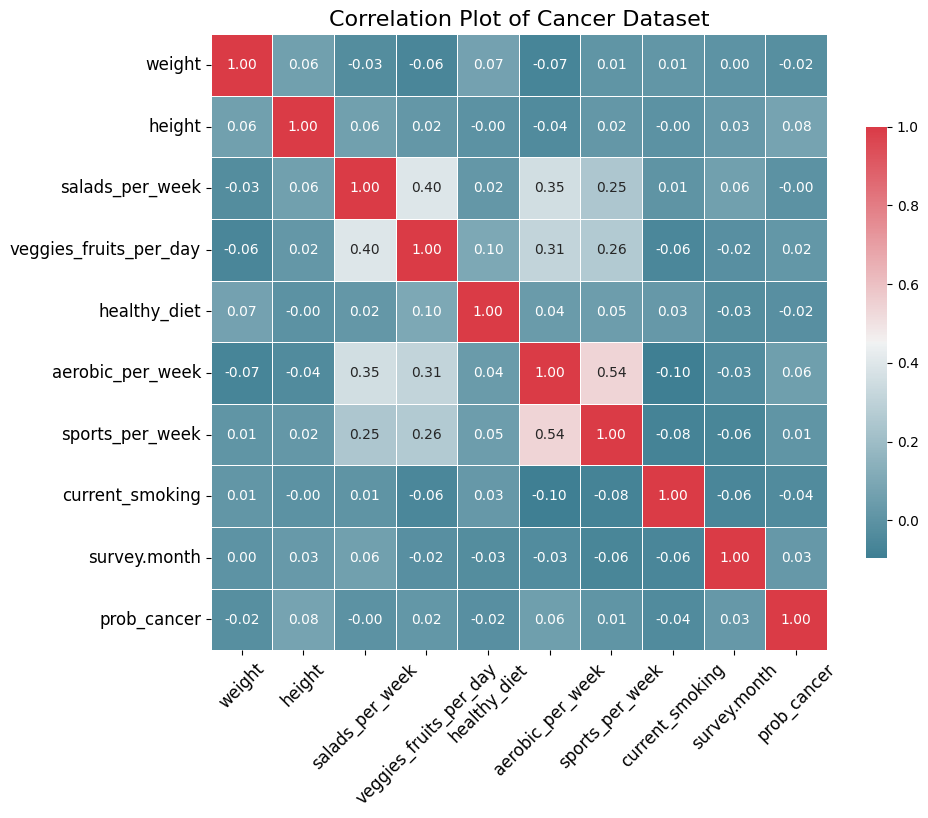

In [21]:
# Plot : correlation matrix --> to see the correlated feaures with (prob_cancer)
# Compute the correlation matrix
corr = data.corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

# Generate a custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, annot=True, fmt=".2f", square=True,
            linewidths=0.5, cbar_kws={"shrink": 0.7}, ax=ax)

# Add a title
plt.title("Correlation Plot of Cancer Dataset", fontsize=16)

# Rotate the x-axis labels
plt.xticks(rotation=45, fontsize=12)

# Rotate the y-axis labels
plt.yticks(rotation=0, fontsize=12)

# Show the plot
plt.show()

In [22]:
# drop the uncorrelated columns

# Identify the uncorrelated columns (e.g. correlation less than 0.01)
uncorr_cols = corr.columns[abs(corr["prob_cancer"]) < 0.01]

# Drop the uncorrelated columns from the dataset
data_new = data.drop(uncorr_cols, axis=1)

# Show the remaining columns
data_new.head()

,weight,height,veggies_fruits_per_day,healthy_diet,aerobic_per_week,current_smoking,survey.month,prob_cancer
0,140.0,69.0,2.150273,1,2.0,0,0,4
1,150.0,67.0,1.000000,1,3.0,0,0,1
2,105.0,66.0,2.000000,0,1.0,0,0,3
3,220.0,77.0,5.000000,4,5.0,0,0,2
4,135.0,62.0,1.000000,3,0.0,0,0,4


In [23]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data_new.drop("prob_cancer", axis=1), data_new["prob_cancer"], test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Print the standardized training data
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print('--------------')
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')

x_train shape: (261, 7)
y_train shape: (261,)
--------------
x_test shape: (113, 7)
y_test shape: (113,)


In [24]:
# Train the KNN model with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(x_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Compute the R2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[2 7 7 1 3 1]
 [3 6 3 3 2 0]
 [3 5 7 1 3 0]
 [5 8 9 4 1 1]
 [2 9 4 6 4 0]
 [0 1 1 1 0 0]]
R2 Score: -0.7585986355884025
Accuracy: 0.20353982300884957
